In [1]:
pwd

'/content'

In [2]:
ls

sample_data/


In [0]:
mkdir dataset


In [4]:
cd /content/drive/My Drive/Emotion detection

/content/drive/My Drive/Emotion detection


In [5]:
ls

Codes.zip  Dataset-20200509T200353Z-001.zip


In [0]:
cp Codes.zip /content/

In [0]:
cp Dataset-20200509T200353Z-001.zip /content/dataset

In [8]:
cd /content

/content


In [9]:
ls

Codes.zip  dataset/  drive/  sample_data/


In [10]:
!unzip Codes.zip

Archive:  Codes.zip
   creating: Codes/
  inflating: Codes/live_demo_speech_emotion_recognition.ipynb  
  inflating: Codes/main_speech_emotion_recognition.ipynb  
   creating: Codes/Dataset/
  inflating: Codes/Dataset/ReadMeFirst.txt  
   creating: Codes/Trained_Models/
  inflating: Codes/Trained_Models/Speech_Emotion_Recognition_Model.h5  
   creating: Codes/demo_audio/
  inflating: Codes/demo_audio/demo_audio.wav  
  inflating: Codes/demo_audio/demo_audio_1.wav  
  inflating: Codes/demo_audio/demo_audio_2.wav  
  inflating: Codes/demo_audio/demo_audio_3.wav  
  inflating: Codes/demo_audio/demo_audio_4.wav  
   creating: Codes/features_dataframe/
  inflating: Codes/features_dataframe/testfeatures  
  inflating: Codes/features_dataframe/testlabel  
  inflating: Codes/features_dataframe/trainfeatures  
  inflating: Codes/features_dataframe/trainlabel  
   creating: Codes/images/
  inflating: Codes/images/audio-features.png  
  inflating: Codes/images/feature_plots.png  
  inflating: Cod

In [11]:
cd /content/dataset/

/content/dataset


In [12]:
!unzip Dataset-20200509T200353Z-001.zip

Archive:  Dataset-20200509T200353Z-001.zip
  inflating: Dataset/happy/happy312.wav  
  inflating: Dataset/happy/happy166.wav  
  inflating: Dataset/happy/happy319.wav  
  inflating: Dataset/happy/happy313.wav  
  inflating: Dataset/happy/happy159.wav  
  inflating: Dataset/happy/happy322.wav  
  inflating: Dataset/happy/happy162.wav  
  inflating: Dataset/happy/happy320.wav  
  inflating: Dataset/happy/happy161.wav  
  inflating: Dataset/happy/happy325.wav  
  inflating: Dataset/happy/happy318.wav  
  inflating: Dataset/happy/happy321.wav  
  inflating: Dataset/happy/happy328.wav  
  inflating: Dataset/happy/happy317.wav  
  inflating: Dataset/happy/happy163.wav  
  inflating: Dataset/happy/happy327.wav  
  inflating: Dataset/happy/happy165.wav  
  inflating: Dataset/happy/happy314.wav  
  inflating: Dataset/happy/happy315.wav  
  inflating: Dataset/happy/happy323.wav  
  inflating: Dataset/happy/happy160.wav  
  inflating: Dataset/happy/happy164.wav  
  inflating: Dataset/happy/happy3

In [13]:
pwd

'/content/dataset'

In [0]:
cp Dataset-20200509T200353Z-001.zip /content/Codes/Dataset/

In [15]:
cd /content/Codes/Dataset/

/content/Codes/Dataset


In [16]:
ls

Dataset-20200509T200353Z-001.zip


In [17]:
!unzip Dataset-20200509T200353Z-001.zip

Archive:  Dataset-20200509T200353Z-001.zip
  inflating: Dataset/happy/happy312.wav  
  inflating: Dataset/happy/happy166.wav  
  inflating: Dataset/happy/happy319.wav  
  inflating: Dataset/happy/happy313.wav  
  inflating: Dataset/happy/happy159.wav  
  inflating: Dataset/happy/happy322.wav  
  inflating: Dataset/happy/happy162.wav  
  inflating: Dataset/happy/happy320.wav  
  inflating: Dataset/happy/happy161.wav  
  inflating: Dataset/happy/happy325.wav  
  inflating: Dataset/happy/happy318.wav  
  inflating: Dataset/happy/happy321.wav  
  inflating: Dataset/happy/happy328.wav  
  inflating: Dataset/happy/happy317.wav  
  inflating: Dataset/happy/happy163.wav  
  inflating: Dataset/happy/happy327.wav  
  inflating: Dataset/happy/happy165.wav  
  inflating: Dataset/happy/happy314.wav  
  inflating: Dataset/happy/happy315.wav  
  inflating: Dataset/happy/happy323.wav  
  inflating: Dataset/happy/happy160.wav  
  inflating: Dataset/happy/happy164.wav  
  inflating: Dataset/happy/happy3

In [18]:
ls

Dataset/  Dataset-20200509T200353Z-001.zip


In [19]:
cd ..

/content/Codes


In [20]:
ls

Dataset/             live_demo_speech_emotion_recognition.ipynb
demo_audio/          main_speech_emotion_recognition.ipynb
features_dataframe/  Trained_Models/
images/              utils/


In [21]:
# Provides a way of using operating system dependent functionality. 
import os

# LibROSA provides the audio analysis
import librosa
# Need to implictly import from librosa
import librosa.display

# Import the audio playback widget
import IPython.display as ipd
from IPython.display import Image

# Enable plot in the notebook
% pylab inline
%matplotlib inline
import matplotlib.pyplot as plt

# These are generally useful to have around
import numpy as np
import pandas as pd


# To build Neural Network and Create desired Model
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D #, AveragePooling1D
from keras.layers import Flatten, Dropout, Activation # Input, 
from keras.layers import Dense #, Embedding
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


Data Preparation:
Plotting the audio file's waveform and its spectrogram

In [23]:
data, sampling_rate = librosa.load('Dataset/Dataset/anger/anger016.wav')
# To play audio this in the jupyter notebook
ipd.Audio('Dataset/Dataset/anger/anger016.wav')

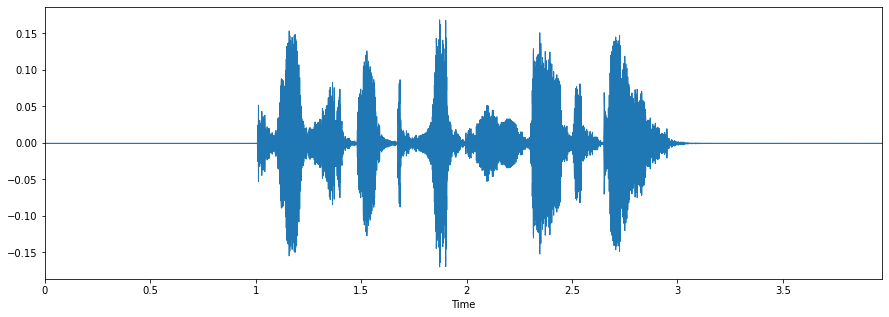

In [24]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

Setup the Basic Paramter

In [0]:
dataset_path = os.path.abspath('./Dataset/Dataset')
destination_path = os.path.abspath('./')
# To shuffle the dataset instances/records
randomize = True
# for spliting dataset into training and testing dataset
split = 0.8
# Number of sample per second e.g. 16KHz
sampling_rate = 20000 
emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]


Converting Dataset in CSV format

it will cause easy operation on Dataset.


In [0]:
# loading dataframes using dataset module 
from utils import dataset
df, train_df, test_df = dataset.create_and_load_meta_csv_df(dataset_path, destination_path, randomize, split)

In [27]:
print('Dataset samples  : ', len(df),"\nTraining Samples : ", len(train_df),"\ntesting Samples  : ", len(test_df))

Dataset samples  :  2556 
Training Samples :  2044 
testing Samples  :  512


In [28]:
Data Visualization

SyntaxError: ignored

**Data Visualization**

In [29]:
df.head()

,path,label
0,/content/Codes/Dataset/Dataset/anger/anger168.wav,0
1,/content/Codes/Dataset/Dataset/fear/fear057.wav,2
2,/content/Codes/Dataset/Dataset/sad/sad245.wav,5
3,/content/Codes/Dataset/Dataset/disgust/disgust...,1
4,/content/Codes/Dataset/Dataset/fear/fear072.wav,2


In [30]:
print("Actual Audio : ", df['path'][0])
print("Labels       : ", df['label'][0])

Actual Audio :  /content/Codes/Dataset/Dataset/anger/anger168.wav
Labels       :  0


*
Labels Assigned for emotions :

    0 : anger
    1 : disgust
    2 : fear
    3 : happy
    4 : neutral
    5 : sad
    6 : surprise

*

In [31]:


unique_labels = train_df.label.unique()
unique_labels.sort()
print("unique labels in Emtion dataset : ")
print(*unique_labels, sep=', ')
unique_labels_counts = train_df.label.value_counts(sort=False)
print("\n\nCount of unique labels in Emtion dataset : ")
print(*unique_labels_counts,sep=', ')



unique labels in Emtion dataset : 
0, 1, 2, 3, 4, 5, 6


Count of unique labels in Emtion dataset : 
341, 213, 341, 349, 238, 356, 206


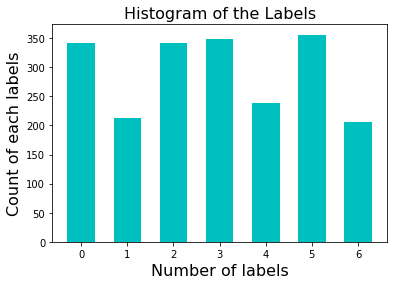

In [32]:
# Histogram of the classes
plt.bar(unique_labels, unique_labels_counts,align = 'center', width=0.6, color = 'c')
plt.xlabel('Number of labels', fontsize=16)
plt.xticks(unique_labels)
plt.ylabel('Count of each labels', fontsize=16)
plt.title('Histogram of the Labels', fontsize=16)
plt.show()

**Data Pre-Processing**


Getting the features of audio files using librosa

Calculating MFCC, Pitch, magnitude, Chroma features.


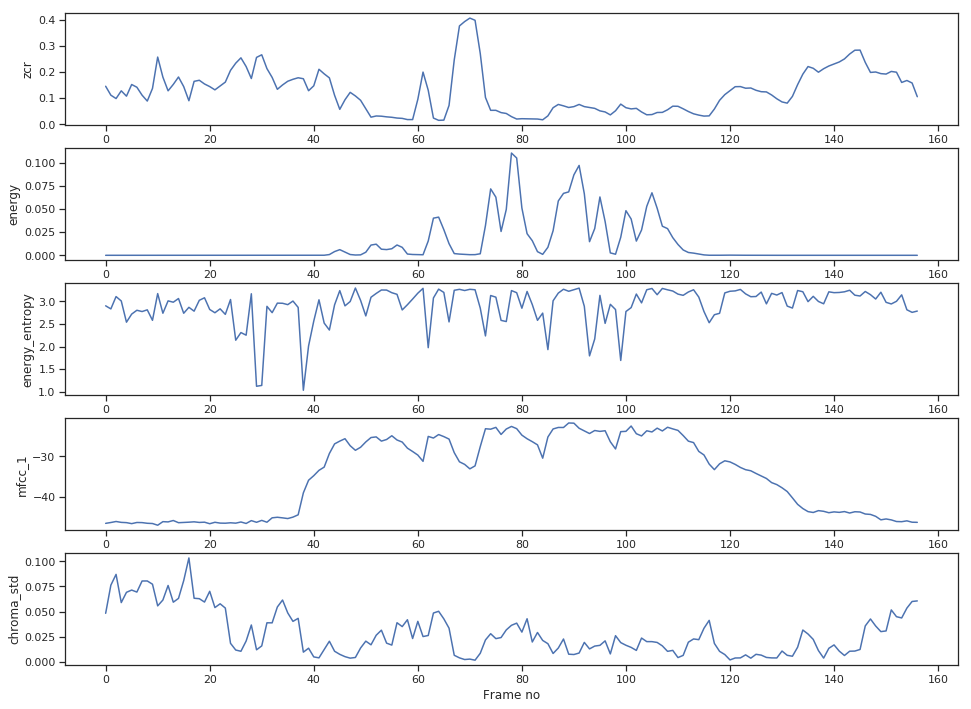

In [33]:
Image('./images/feature_plots.png')

In [0]:
from utils.feature_extraction import get_features_dataframe
from utils.feature_extraction import get_audio_features





In [0]:
trainfeatures, trainlabel = get_features_dataframe(train_df, sampling_rate)
testfeatures, testlabel = get_features_dataframe(test_df, sampling_rate)

# I have ran above 2 lines and get the featured dataframe. 
# and store it into pickle file to use it for later purpose.
# it take too much time to generate features(around 30-40 minutes).

trainfeatures = pd.read_pickle('./features_dataframe/trainfeatures')
trainlabel = pd.read_pickle('./features_dataframe/trainlabel')
testfeatures = pd.read_pickle('./features_dataframe/testfeatures')
testlabel = pd.read_pickle('./features_dataframe/testlabel')

In [46]:


trainfeatures.shape



(2044, 65)

In [0]:
trainfeatures = trainfeatures.fillna(0)
testfeatures = testfeatures.fillna(0)

In [0]:
# By using .ravel() : Converting 2D to 1D e.g. (512,1) -> (512,). To prevent DataConversionWarning

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel).ravel()
X_test = np.array(testfeatures)
y_test = np.array(testlabel).ravel()

In [49]:


y_train[:5]



array([3, 2, 2, 0, 3])

In [0]:
# One-Hot Encoding
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [51]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

Changing dimension for CNN model

In [0]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [53]:
x_traincnn.shape

(2044, 65, 1)

Model

In [0]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 65, 256)           1536      
_________________________________________________________________
activation_1 (Activation)    (None, 65, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 65, 128)           163968    
_________________________________________________________________
activation_2 (Activation)    (None, 65, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 65, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 128)           

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [57]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=400, validation_data=(x_testcnn, y_test))

Train on 2044 samples, validate on 512 samples
Epoch 1/400
2044/2044 [==============================] - 7s 3ms/step - loss: 1.9907 - accuracy: 0.1908 - val_loss: 1.8025 - val_accuracy: 0.2539
Epoch 2/400
2044/2044 [==============================] - 1s 316us/step - loss: 1.8341 - accuracy: 0.2480 - val_loss: 1.7410 - val_accuracy: 0.2734
Epoch 3/400
2044/2044 [==============================] - 1s 308us/step - loss: 1.7627 - accuracy: 0.2798 - val_loss: 1.6901 - val_accuracy: 0.3008
Epoch 4/400
2044/2044 [==============================] - 1s 301us/step - loss: 1.7093 - accuracy: 0.3165 - val_loss: 1.6700 - val_accuracy: 0.3535
Epoch 5/400
2044/2044 [==============================] - 1s 305us/step - loss: 1.6716 - accuracy: 0.3376 - val_loss: 1.6656 - val_accuracy: 0.3340
Epoch 6/400
2044/2044 [==============================] - 1s 296us/step - loss: 1.6512 - accuracy: 0.3508 - val_loss: 1.6182 - val_accuracy: 0.3535
Epoch 7/400
2044/2044 [==============================] - 1s 304us/step - 

Loss Vs Iterations

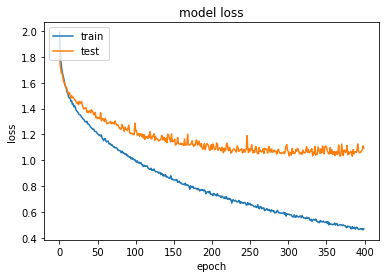

In [58]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)


In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 65, 256)           1536      
_________________________________________________________________
activation_6 (Activation)    (None, 65, 256)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 65, 128)           163968    
_________________________________________________________________
activation_7 (Activation)    (None, 65, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 65, 128)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 128)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 8, 128)           

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [62]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=8, epochs=200, validation_data=(x_testcnn, y_test))

Train on 2044 samples, validate on 512 samples
Epoch 1/200
2044/2044 [==============================] - 1s 722us/step - loss: 2.3156 - accuracy: 0.1747 - val_loss: 1.8832 - val_accuracy: 0.2148
Epoch 2/200
2044/2044 [==============================] - 1s 590us/step - loss: 2.0333 - accuracy: 0.2314 - val_loss: 1.7968 - val_accuracy: 0.2383
Epoch 3/200
2044/2044 [==============================] - 1s 571us/step - loss: 1.9096 - accuracy: 0.2676 - val_loss: 1.7142 - val_accuracy: 0.3184
Epoch 4/200
2044/2044 [==============================] - 1s 593us/step - loss: 1.8404 - accuracy: 0.2661 - val_loss: 1.6934 - val_accuracy: 0.3320
Epoch 5/200
2044/2044 [==============================] - 1s 595us/step - loss: 1.7791 - accuracy: 0.3126 - val_loss: 1.6737 - val_accuracy: 0.3574
Epoch 6/200
2044/2044 [==============================] - 1s 578us/step - loss: 1.7233 - accuracy: 0.3190 - val_loss: 1.6436 - val_accuracy: 0.3887
Epoch 7/200
2044/2044 [==============================] - 1s 589us/step 

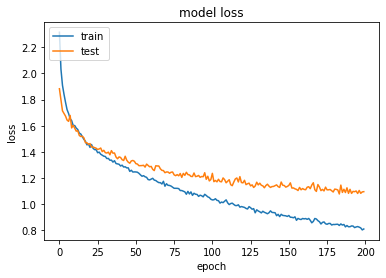

In [63]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model = Sequential()

model.add(Conv1D(512, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(256, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [66]:


model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 65, 512)           3072      
_________________________________________________________________
activation_16 (Activation)   (None, 65, 512)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 65, 256)           655616    
_________________________________________________________________
activation_17 (Activation)   (None, 65, 256)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 65, 256)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 8, 256)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 8, 128)           

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [68]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=8, epochs=150, validation_data=(x_testcnn, y_test))

Train on 2044 samples, validate on 512 samples
Epoch 1/150
2044/2044 [==============================] - 2s 811us/step - loss: 1.9990 - accuracy: 0.2197 - val_loss: 1.7580 - val_accuracy: 0.2715
Epoch 2/150
2044/2044 [==============================] - 1s 672us/step - loss: 1.7907 - accuracy: 0.2862 - val_loss: 1.7010 - val_accuracy: 0.2871
Epoch 3/150
2044/2044 [==============================] - 1s 665us/step - loss: 1.7130 - accuracy: 0.3258 - val_loss: 1.6333 - val_accuracy: 0.3789
Epoch 4/150
2044/2044 [==============================] - 1s 682us/step - loss: 1.6576 - accuracy: 0.3611 - val_loss: 1.6115 - val_accuracy: 0.3750
Epoch 5/150
2044/2044 [==============================] - 1s 661us/step - loss: 1.6034 - accuracy: 0.3953 - val_loss: 1.5892 - val_accuracy: 0.3828
Epoch 6/150
2044/2044 [==============================] - 1s 679us/step - loss: 1.5678 - accuracy: 0.3958 - val_loss: 1.5857 - val_accuracy: 0.3770
Epoch 7/150
2044/2044 [==============================] - 1s 668us/step 

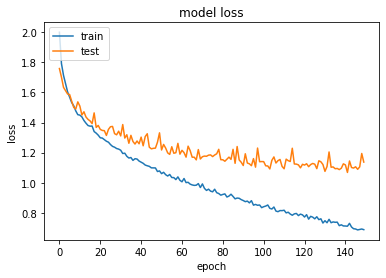

In [69]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 65, 256)           1536      
_________________________________________________________________
activation_21 (Activation)   (None, 65, 256)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 65, 128)           163968    
_________________________________________________________________
activation_22 (Activation)   (None, 65, 128)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 65, 128)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 8, 128)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 8, 128)           

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [73]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=400, validation_data=(x_testcnn, y_test))

Train on 2044 samples, validate on 512 samples
Epoch 1/400
2044/2044 [==============================] - 1s 396us/step - loss: 2.0925 - accuracy: 0.1683 - val_loss: 1.8260 - val_accuracy: 0.2402
Epoch 2/400
2044/2044 [==============================] - 1s 306us/step - loss: 1.8785 - accuracy: 0.2402 - val_loss: 1.7568 - val_accuracy: 0.3027
Epoch 3/400
2044/2044 [==============================] - 1s 297us/step - loss: 1.7753 - accuracy: 0.3092 - val_loss: 1.7083 - val_accuracy: 0.3457
Epoch 4/400
2044/2044 [==============================] - 1s 301us/step - loss: 1.7528 - accuracy: 0.3092 - val_loss: 1.6935 - val_accuracy: 0.3320
Epoch 5/400
2044/2044 [==============================] - 1s 304us/step - loss: 1.7022 - accuracy: 0.3337 - val_loss: 1.6576 - val_accuracy: 0.3242
Epoch 6/400
2044/2044 [==============================] - 1s 295us/step - loss: 1.6640 - accuracy: 0.3420 - val_loss: 1.6610 - val_accuracy: 0.3379
Epoch 7/400
2044/2044 [==============================] - 1s 306us/step 

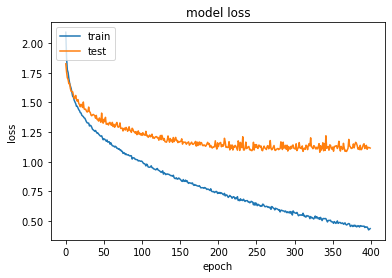

In [74]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving the model

In [75]:


model_name = 'Speech_Emotion_Recognition_Model.h5'
save_dir = os.path.join(os.getcwd(), 'Trained_Models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)



Saved trained model at /content/Codes/Trained_Models/Speech_Emotion_Recognition_Model.h5 


In [0]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Loading the model

In [78]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./Trained_Models/Speech_Emotion_Recognition_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 57.62%


Test Set Prediction:
Predicting emotions on the test data


In [79]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

512/512 [==============================] - 0s 103us/step


In [80]:


preds



array([[9.8718010e-02, 1.9087334e-03, 8.2704866e-01, ..., 1.4407279e-02,
        1.0474728e-03, 3.4958996e-02],
       [9.3876272e-01, 1.0961805e-03, 2.0131612e-02, ..., 1.5930011e-04,
        6.4170957e-03, 8.5621497e-05],
       [4.3975180e-03, 7.9426533e-01, 3.5314970e-03, ..., 1.6706832e-01,
        7.5203865e-03, 2.0849282e-02],
       ...,
       [8.7925000e-03, 7.8199351e-01, 1.4901555e-01, ..., 4.7149494e-02,
        2.1722962e-03, 4.7763749e-03],
       [5.3746596e-02, 2.7432991e-04, 4.9964648e-01, ..., 1.3387812e-05,
        1.6334344e-01, 4.5327892e-05],
       [4.8439231e-02, 1.9894575e-01, 7.4049599e-02, ..., 3.4980846e-03,
        2.8693238e-03, 6.2962943e-01]], dtype=float32)

In [0]:
preds1=preds.argmax(axis=1)

In [82]:


preds1



array([2, 0, 1, 3, 3, 0, 3, 3, 3, 5, 2, 2, 0, 4, 4, 3, 0, 5, 4, 5, 2, 1,
       3, 4, 0, 0, 0, 2, 2, 3, 3, 4, 2, 3, 1, 3, 5, 3, 1, 3, 4, 6, 4, 0,
       5, 1, 1, 5, 1, 1, 1, 3, 5, 4, 5, 5, 2, 0, 2, 4, 4, 0, 5, 1, 0, 3,
       4, 0, 0, 0, 3, 2, 6, 0, 4, 4, 6, 6, 0, 1, 5, 1, 0, 2, 3, 3, 6, 0,
       1, 0, 3, 0, 4, 2, 2, 3, 6, 5, 4, 2, 0, 4, 5, 4, 3, 2, 5, 3, 6, 6,
       2, 0, 0, 3, 4, 5, 3, 2, 2, 3, 5, 3, 6, 3, 0, 5, 1, 2, 5, 0, 1, 0,
       1, 3, 4, 0, 3, 0, 0, 4, 0, 0, 1, 2, 3, 0, 1, 5, 4, 2, 5, 1, 4, 0,
       5, 4, 1, 2, 6, 1, 0, 5, 5, 5, 0, 0, 4, 4, 3, 6, 6, 5, 1, 4, 6, 1,
       2, 1, 2, 5, 1, 0, 4, 6, 2, 2, 2, 2, 1, 0, 3, 0, 4, 1, 4, 1, 0, 6,
       2, 0, 0, 2, 5, 4, 6, 3, 4, 6, 0, 4, 3, 3, 2, 2, 1, 1, 5, 6, 3, 4,
       5, 0, 0, 3, 4, 4, 1, 5, 3, 3, 5, 1, 4, 4, 0, 3, 1, 5, 1, 6, 6, 4,
       5, 2, 4, 5, 5, 2, 1, 0, 1, 4, 0, 5, 0, 1, 1, 1, 3, 4, 3, 3, 4, 4,
       2, 6, 5, 1, 2, 2, 2, 4, 2, 1, 1, 3, 2, 5, 0, 0, 2, 0, 5, 0, 1, 5,
       3, 4, 2, 1, 5, 3, 4, 6, 4, 0, 0, 5, 1, 1, 5,

In [0]:
abc = preds1.astype(int).flatten()

In [0]:
predictions = (lb.inverse_transform((abc)))

In [85]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,2
1,0
2,1
3,3
4,3
5,0
6,3
7,3
8,3
9,5


In [0]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [87]:


actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]



,actualvalues
0,2
1,0
2,1
3,2
4,3
5,6
6,6
7,5
8,3
9,5


In [0]:
finaldf = actualdf.join(preddf)

Actual v/s Predicted emotions

In [89]:
finaldf[170:180]

,actualvalues,predictedvalues
170,6,6
171,1,5
172,1,1
173,4,4
174,3,6
175,1,1
176,6,2
177,0,1
178,2,2
179,5,5


In [90]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
0,81
1,60
2,83
3,85
4,53
5,97
6,53


In [91]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
0,90
1,73
2,84
3,75
4,66
5,79
6,45


In [0]:
finaldf.to_csv('Predictions.csv', index=False)



Live Demonstration

In [0]:
demo_audio_path = './demo_audio/demo_audio.wav'

In [0]:
demo_mfcc, demo_pitch, demo_mag, demo_chrom = get_audio_features(demo_audio_path,sampling_rate)

mfcc = pd.Series(demo_mfcc)
pit = pd.Series(demo_pitch)
mag = pd.Series(demo_mag)
C = pd.Series(demo_chrom)
demo_audio_features = pd.concat([mfcc,pit,mag,C],ignore_index=True)

In [0]:
demo_audio_features= np.expand_dims(demo_audio_features, axis=0)
demo_audio_features= np.expand_dims(demo_audio_features, axis=2)

In [100]:
demo_audio_features.shape

(1, 65, 1)

In [101]:
livepreds = loaded_model.predict(demo_audio_features, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 48ms/step


In [102]:
livepreds

array([[9.7660404e-01, 7.9918967e-04, 2.2480097e-02, 5.4143715e-05,
        3.3300330e-05, 3.1580287e-06, 2.6096584e-05]], dtype=float32)

In [103]:
# emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]
index = livepreds.argmax(axis=1).item()
index

0

In [104]:
emotions[index]



'anger'

Implementation


In [106]:
import wave
import keras
import pyaudio
import pandas as pd
import numpy as np

import IPython.display as ipd

ModuleNotFoundError: ignored

In [108]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 0s (1,970 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 144429 files and directories currently installed.)
Prepa

In [110]:
!pip install pyaudio

  Created wheel for pyaudio: filename=PyAudio-0.2.11-cp36-cp36m-linux_x86_64.whl size=51618 sha256=8a555f248dbd2d35a1bb89b4ac24899508a5cad88150338ac21b86c0b1cff540
  Stored in directory: /root/.cache/pip/wheels/f4/a8/a4/292214166c2917890f85b2f72a8e5f13e1ffa527c4200dcede
Successfully built pyaudio


In [0]:
import wave
import keras
import pyaudio
import pandas as pd
import numpy as np

import IPython.display as ipd